# PCA  (analisis de componente principal)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
# normalizacion

data=data.drop(columns=['target_class'])

In [4]:
data_rescaled_mano=(data-np.mean(data))/np.std(data)
data_rescaled_s=StandardScaler().fit_transform(data)

np.sum(data_rescaled_mano-data_rescaled_s)

 Mean of the integrated profile                  0.000000e+00
 Standard deviation of the integrated profile   -1.115067e-10
 Excess kurtosis of the integrated profile      -3.456999e-11
 Skewness of the integrated profile             -7.172045e-12
 Mean of the DM-SNR curve                        1.174245e-11
 Standard deviation of the DM-SNR curve         -9.144349e-11
 Excess kurtosis of the DM-SNR curve             2.822222e-11
 Skewness of the DM-SNR curve                    1.180685e-11
dtype: float64

In [5]:
data_rescaled_mano=(data-np.min(data))/(np.max(data)-np.min(data))
data_rescaled_m=MinMaxScaler().fit_transform(data)

np.sum(data_rescaled_mano-data_rescaled_m)

 Mean of the integrated profile                  1.568736e-13
 Standard deviation of the integrated profile    5.605374e-14
 Excess kurtosis of the integrated profile       1.882314e-13
 Skewness of the integrated profile              2.829209e-14
 Mean of the DM-SNR curve                        1.212409e-13
 Standard deviation of the DM-SNR curve          4.598752e-14
 Excess kurtosis of the DM-SNR curve            -2.881462e-13
 Skewness of the DM-SNR curve                    6.918713e-14
dtype: float64

In [6]:
data=StandardScaler().fit_transform(data)

In [7]:
pca=PCA()
pca.fit(data)
pca.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


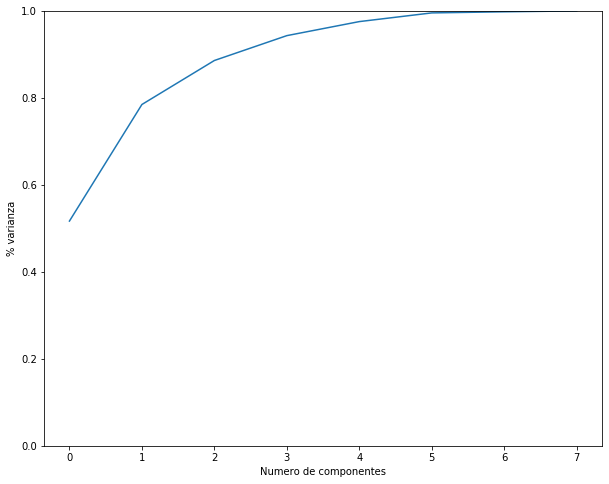

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0,1])
plt.show();

In [10]:
pca=PCA(n_components=4)
df=pd.DataFrame(pca.fit_transform(data))
df.head()

,0,1,2,3
0,-1.278849,-1.273133,0.016213,0.662102
1,-1.020553,-0.201162,0.670478,1.605779
2,0.188289,0.432114,-0.979766,-0.519232
3,-1.015466,-1.469881,-0.018832,0.938386
4,-0.822626,2.123651,0.407953,-0.380922


In [11]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794
...,...,...,...,...,...,...,...,...
17893,0.988208,1.943284,-0.625655,-0.406697,-0.384010,-0.727295,1.586054,1.700034
17894,0.447319,0.429062,-0.328831,-0.234643,0.128776,0.939926,-1.189159,-0.906574
17895,0.321842,1.956220,-0.299334,-0.407492,0.299137,1.671568,-1.288079,-0.941330
17896,0.133628,1.074510,-0.260050,-0.291041,-0.361967,-0.664857,0.378257,0.275850


In [12]:
pd.DataFrame(pca.inverse_transform(df))

,0,1,2,3,4,5,6,7
0,0.726963,1.327427,-0.735075,-0.783587,-0.337221,-0.257022,-0.070554,-0.255592
1,-0.038332,1.811110,0.059444,-0.129622,-0.454226,-0.587282,0.417421,0.287539
2,-0.059363,-1.046436,-0.031402,0.033576,-0.428290,-0.159977,-0.140189,-0.349821
3,0.623153,1.549935,-0.607552,-0.691777,-0.309245,-0.172273,-0.269003,-0.486495
4,-0.366730,-0.849173,0.255278,0.285361,-0.451494,-0.797759,1.303397,1.398872
...,...,...,...,...,...,...,...,...
17893,0.650213,1.919780,-0.659565,-0.741024,-0.226992,-0.881246,1.506225,1.708809
17894,0.396937,0.407380,-0.320539,-0.304422,0.397700,0.684679,-1.049546,-1.109075
17895,0.449061,1.911096,-0.247702,-0.344586,0.849042,0.981183,-1.268849,-1.191775
17896,0.181944,1.079722,-0.204666,-0.298045,-0.457402,-0.537469,0.415628,0.290026


# ICA (analisis de componente independiente)

In [13]:
# el problema de la fiesta

from scipy import signal
from sklearn.decomposition import FastICA

In [14]:
time=np.linspace(0, 8, 2000)

s1=np.sin(2*time)
s2=np.sign(np.sin(3*time))
s3=signal.sawtooth(2*np.pi*time)

In [15]:
S=np.c_[s1, s2, s3]
S+=0.2*np.random.normal(size=S.shape)
S/=S.std(axis=0)

In [16]:
A=np.array([[1,1,1], [0.5, 2, 1], [1.5, 1, 2]])
X=np.dot(S, A.T)  # observaciones

In [17]:
ica=FastICA(n_components=3)
S_ica=ica.fit_transform(X)
A_ica=ica.mixing_

In [18]:
pca=PCA(n_components=3)

S_pca=pca.fit_transform(X)

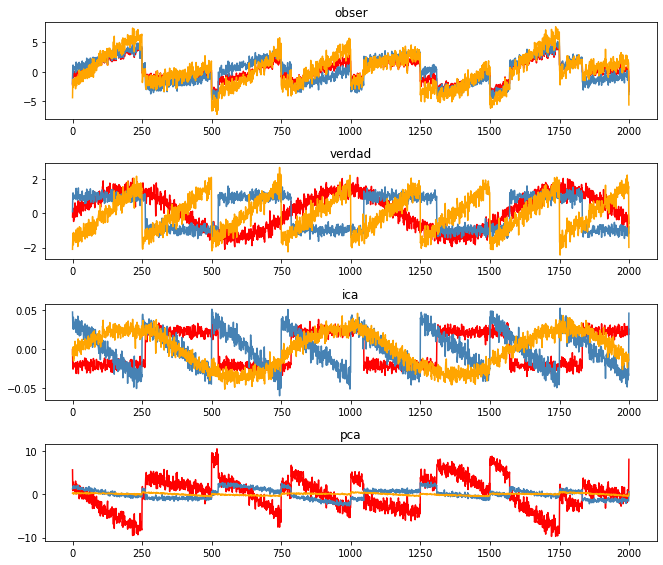

In [19]:
plt.figure(figsize=(10, 8))

modelos=[X, S, S_ica, S_pca]

nombres=['obser', 'verdad', 'ica', 'pca']

colores=['red', 'steelblue', 'orange']

for i,(m, n) in enumerate(zip(modelos, nombres), 1):
    plt.subplot(4, 1, i)
    plt.title(n)
    
    for sig, c in zip(m.T, colores):
        plt.plot(sig, color=c)
        
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)

plt.show();

# UMAP (uniform manifold aprox and projection)

In [20]:
import umap
import seaborn as sns
from sklearn.datasets import load_iris

In [21]:
load_iris().data.shape

(150, 4)

In [22]:
load_iris().target.shape

(150,)

In [23]:
redu=umap.UMAP(n_components=2).fit_transform(load_iris().data)
redu.shape

/Users/data/Library/Python/3.7/lib/python/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(150, 2)

Text(0.5, 1.0, 'Proyaccion UMAP')

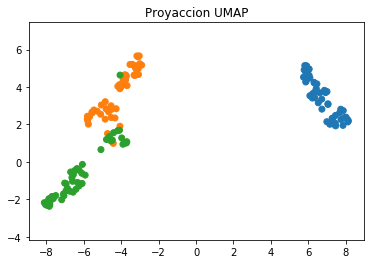

In [24]:
plt.scatter(redu[:,0], redu[:,1], c=[sns.color_palette()[x] for x in load_iris().target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyaccion UMAP')

# Series Temporales

In [25]:
df=pd.read_csv('data/occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
date             2664 non-null object
Temperature      2664 non-null float64
Humidity         2664 non-null float64
Light            2664 non-null float64
CO2              2664 non-null float64
HumidityRatio    2664 non-null float64
Occupancy        2664 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


In [27]:
df['datetime']=pd.to_datetime(df.date)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2015-02-02 14:00:00
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1,2015-02-02 15:00:00
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2015-02-02 16:00:00
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2015-02-02 17:00:00
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2015-02-02 18:00:00


In [28]:
df=df.set_index('datetime')
df.drop(columns=['date'], inplace=True)

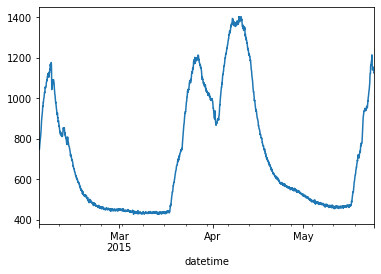

In [29]:
df.CO2.plot()

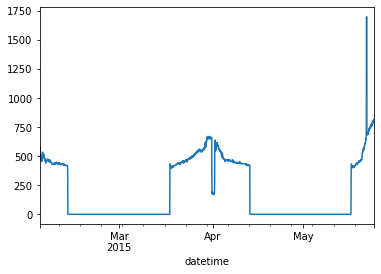

In [30]:
df.Light.plot()

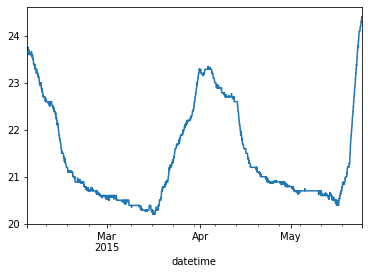

In [31]:
df.Temperature.plot()

In [32]:
import statsmodels.api as sm

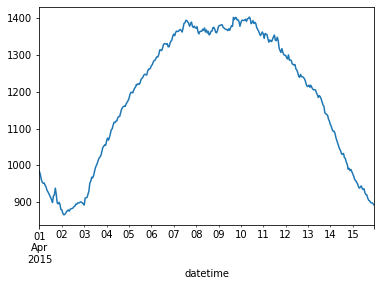

In [33]:
dias=df.CO2.loc['2015-4-1':'2015-4-15']
dias.plot()

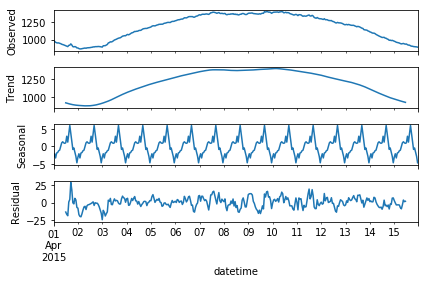

In [34]:
res=sm.tsa.seasonal_decompose(dias)
resplot=res.plot()

In [35]:
from pandas.plotting import lag_plot

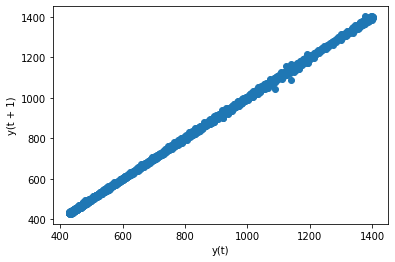

In [36]:
lag_plot(df.CO2);

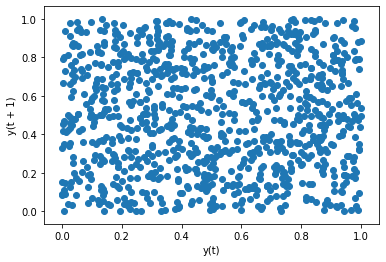

In [37]:
lag_plot(pd.Series(np.random.random(1000)))

In [38]:
# AR

from statsmodels.tsa.ar_model import AR

In [39]:
train, test=df.CO2[:-10], df.CO2[-10:]

In [40]:
modelo=AR(train).fit()

/Users/data/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [41]:
pred=modelo.predict(len(train), len(df.CO2)-1)
error=(pred-test).abs().sum()/len(pred)
error

15.945951493728057

In [42]:
res=pd.DataFrame({'real':test, 'prediccion':pred, 'diff':pred-test})
res

,real,prediccion,diff
2015-05-24 04:00:00,1153.250000,1152.958812,-0.291188
2015-05-24 05:00:00,1152.400000,1152.627357,0.227357
2015-05-24 06:00:00,1146.166667,1153.235932,7.069265
2015-05-24 07:00:00,1145.400000,1154.050327,8.650327
2015-05-24 08:00:00,1140.800000,1154.395504,13.595504
2015-05-24 09:00:00,1150.250000,1154.473304,4.223304
2015-05-24 10:00:00,1129.200000,1156.070730,26.870730
2015-05-24 11:00:00,1125.800000,1157.665545,31.865545
2015-05-24 12:00:00,1123.000000,1157.195279,34.195279
2015-05-24 13:00:00,1124.000000,1156.471016,32.471016


In [43]:
import warnings
warnings.simplefilter('ignore')

for i in range(1, 100, 10):
    modelo=AR(train).fit(maxlag=i)
    pred=modelo.predict(len(train), len(df.CO2)-1)
    error=(pred-test).abs().sum()/len(pred)
    print ('Cota de error: ', error, 'Maxlag: ', i)

Cota de error:  15.016314895082996 Maxlag:  1
Cota de error:  7.62305791780957 Maxlag:  11
Cota de error:  9.742344952804956 Maxlag:  21
Cota de error:  15.087661037050385 Maxlag:  31
Cota de error:  15.348752082566966 Maxlag:  41
Cota de error:  15.457622069433137 Maxlag:  51
Cota de error:  13.623297355130967 Maxlag:  61
Cota de error:  12.728207417604995 Maxlag:  71
Cota de error:  11.968473297218452 Maxlag:  81
Cota de error:  13.542909149514866 Maxlag:  91


In [44]:
# ARMA  order==> p=>AR, q=>MA

from statsmodels.tsa.arima_model import ARMA

In [45]:
modelo=ARMA(train, order=(20, 2)).fit(disp=False)

In [46]:
pred=modelo.predict(len(train), len(df.CO2)-1)
error=(pred-test).abs().sum()/len(pred)
print ('Cota de error: ', error)
res=pd.DataFrame({'real':test, 'prediccion':pred, 'diff':pred-test})
res

Cota de error:  17.791617948393696


,real,prediccion,diff
2015-05-24 04:00:00,1153.250000,1152.859258,-0.390742
2015-05-24 05:00:00,1152.400000,1152.774476,0.374476
2015-05-24 06:00:00,1146.166667,1153.138355,6.971688
2015-05-24 07:00:00,1145.400000,1154.868241,9.468241
2015-05-24 08:00:00,1140.800000,1155.756445,14.956445
2015-05-24 09:00:00,1150.250000,1155.802751,5.552751
2015-05-24 10:00:00,1129.200000,1158.355982,29.155982
2015-05-24 11:00:00,1125.800000,1160.795932,34.995932
2015-05-24 12:00:00,1123.000000,1161.301516,38.301516
2015-05-24 13:00:00,1124.000000,1161.748406,37.748406


In [47]:
# ARIMA  order==> (p, d, q)  d=>Integrated

from statsmodels.tsa.arima_model import ARIMA

modelo=ARIMA(train, order=(20, 1, 5)).fit(disp=False)

pred=modelo.predict(len(train), len(df.CO2)-1)
error=(pred-test).abs().sum()/len(pred)
print ('Cota de error: ', error)
res=pd.DataFrame({'real':test, 'prediccion':pred, 'diff':pred-test})
res

Cota de error:  1138.2828670047163


,real,prediccion,diff
2015-05-24 04:00:00,1153.250000,0.336369,-1152.913631
2015-05-24 05:00:00,1152.400000,0.118519,-1152.281481
2015-05-24 06:00:00,1146.166667,0.494256,-1145.672411
2015-05-24 07:00:00,1145.400000,1.594288,-1143.805712
2015-05-24 08:00:00,1140.800000,0.574395,-1140.225605
2015-05-24 09:00:00,1150.250000,-0.181455,-1150.431455
2015-05-24 10:00:00,1129.200000,2.357005,-1126.842995
2015-05-24 11:00:00,1125.800000,2.036177,-1123.763823
2015-05-24 12:00:00,1123.000000,0.043824,-1122.956176
2015-05-24 13:00:00,1124.000000,0.064619,-1123.935381


In [48]:
# ADF-test (testeo de la estacionaridad)

In [49]:
# SARIMA-SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
modelo=SARIMAX(train, order=(20, 1, 5)).fit(disp=False)

pred=modelo.predict(len(train), len(df.CO2)-1)
error=(pred-test).abs().sum()/len(pred)
print ('Cota de error: ', error)
res=pd.DataFrame({'real':test, 'prediccion':pred, 'diff':pred-test})
res

Cota de error:  19.044490875284783


,real,prediccion,diff
2015-05-24 04:00:00,1153.250000,1153.902594,0.652594
2015-05-24 05:00:00,1152.400000,1153.892666,1.492666
2015-05-24 06:00:00,1146.166667,1154.531332,8.364665
2015-05-24 07:00:00,1145.400000,1155.801991,10.401991
2015-05-24 08:00:00,1140.800000,1156.952636,16.152636
2015-05-24 09:00:00,1150.250000,1157.437672,7.187672
2015-05-24 10:00:00,1129.200000,1160.289677,31.089677
2015-05-24 11:00:00,1125.800000,1162.474366,36.674366
2015-05-24 12:00:00,1123.000000,1162.634892,39.634892
2015-05-24 13:00:00,1124.000000,1162.793750,38.793750


# FB-Prophet

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

In [52]:
# datos, consumo de energia

pjme=pd.read_csv('data/PJME_hourly.csv', index_col=[0], parse_dates=[0])
pjme.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


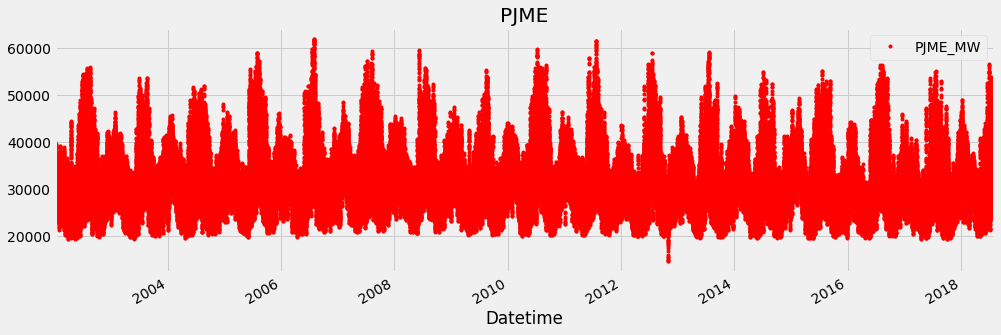

In [53]:
_=pjme.plot(style='.', figsize=(15, 5), color='r', title='PJME')

In [54]:
# se definen las caracteristicas temporales

def features(df, label):
    df=df.copy()
    df['date']=df.index
    df['hour']=df.date.dt.hour
    df['day_of_week']=df.date.dt.dayofweek
    df['quarter']=df.date.dt.quarter
    df['month']=df.date.dt.month
    df['year']=df.date.dt.year
    df['day_of_year']=df.date.dt.dayofyear
    df['day_of_month']=df.date.dt.day
    df['week_of_year']=df.date.dt.weekofyear
    
    X=df[['hour', 'day_of_week', 'quarter', 'month', 'year',
          'day_of_year', 'day_of_month', 'week_of_year']]
    y=df[label]
    
    return X,y

In [55]:
X, y = features(pjme, 'PJME_MW')
data=pd.concat([X, y], axis=1)
data.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


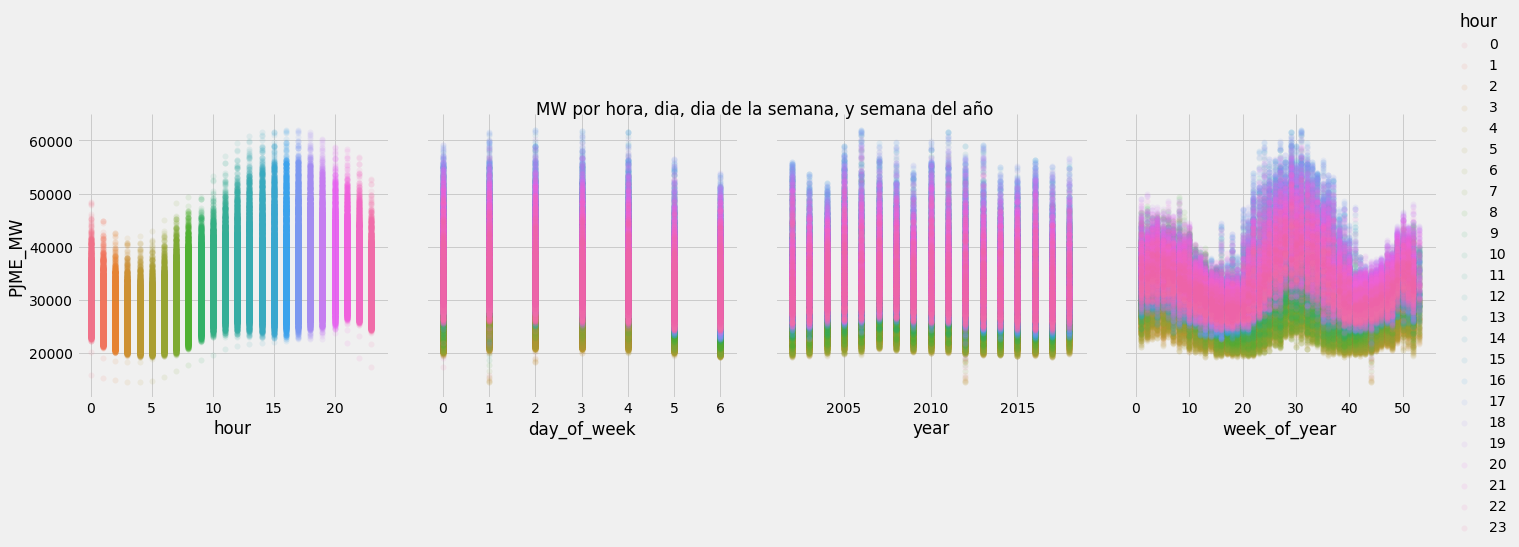

In [56]:
sns.pairplot(data.dropna(), hue='hour', 
            x_vars=['hour', 'day_of_week', 'year', 'week_of_year'],
            y_vars='PJME_MW', height=5, plot_kws={'alpha':0.1, 'linewidth':0})

plt.suptitle('MW por hora, dia, dia de la semana, y semana del año')
plt.show();

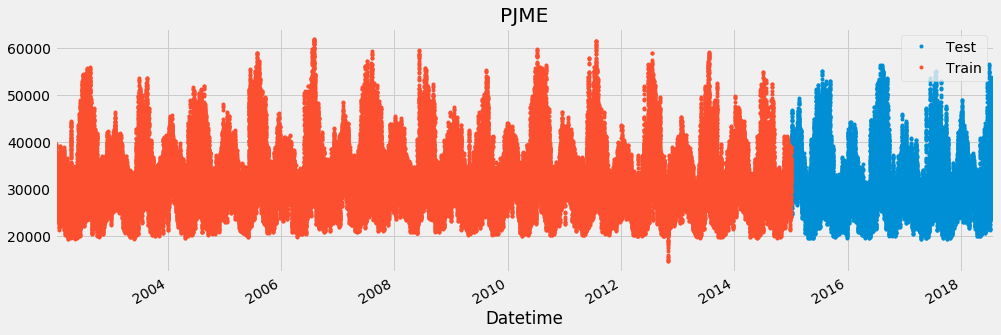

In [57]:
split_date='01-Jan-2015'

train=pjme.loc[pjme.index<=split_date].copy()
test=pjme.loc[pjme.index>split_date].copy()

_=test.rename(columns={'PJME_MW': 'Test'})\
      .join(train.rename(columns={'PJME_MW': 'Train'}), how='outer')\
      .plot(figsize=(15,5), title='PJME', style='.')

In [58]:
# modelo

train=train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
test=test.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
train.head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [59]:
modelo=Prophet().fit(train)

pred=modelo.predict(test)

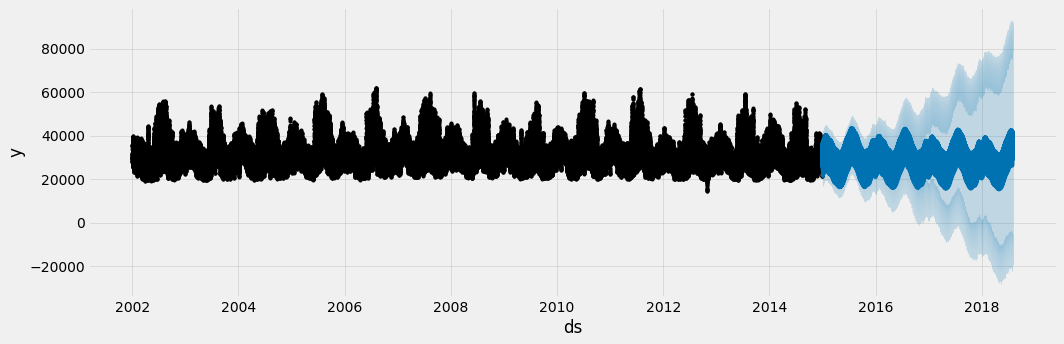

In [60]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig=modelo.plot(pred, ax=ax)

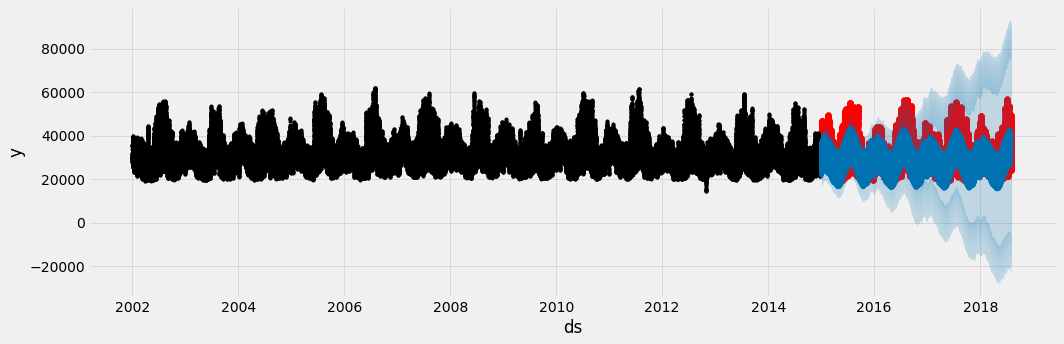

In [61]:
# comparando

f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

In [62]:
# metricas de error

mean_squared_error(test.y, pred.yhat)**0.5

6617.582523051441

In [63]:
mean_absolute_error(test.y, pred.yhat)

5182.773042911244

In [64]:
def mape(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [65]:
mape(test.y, pred.yhat)

16.510175822754576

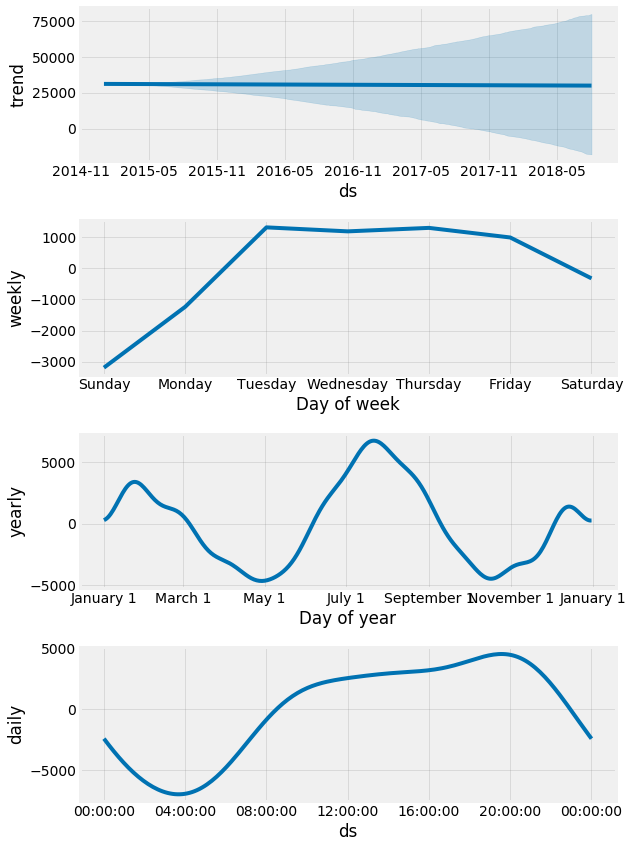

In [66]:
fig = modelo.plot_components(pred)

In [67]:
# Con vacaciones

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
train_h = cal.holidays(train.index.min(), train.index.max())
test_h = cal.holidays(test.index.min(), test.index.max())

In [68]:
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])
df_h = pjme.loc[pjme['is_holiday']].reset_index().rename(columns={'Datetime':'ds'})
df_h['holiday'] = 'USFederalHoliday'
df_h = df_h.drop(['PJME_MW','date','is_holiday'], axis=1)
df_h.head()

,ds,holiday
0,2003-01-01 00:00:00,USFederalHoliday
1,2002-12-25 01:00:00,USFederalHoliday
2,2002-12-25 02:00:00,USFederalHoliday
3,2002-12-25 03:00:00,USFederalHoliday
4,2002-12-25 04:00:00,USFederalHoliday


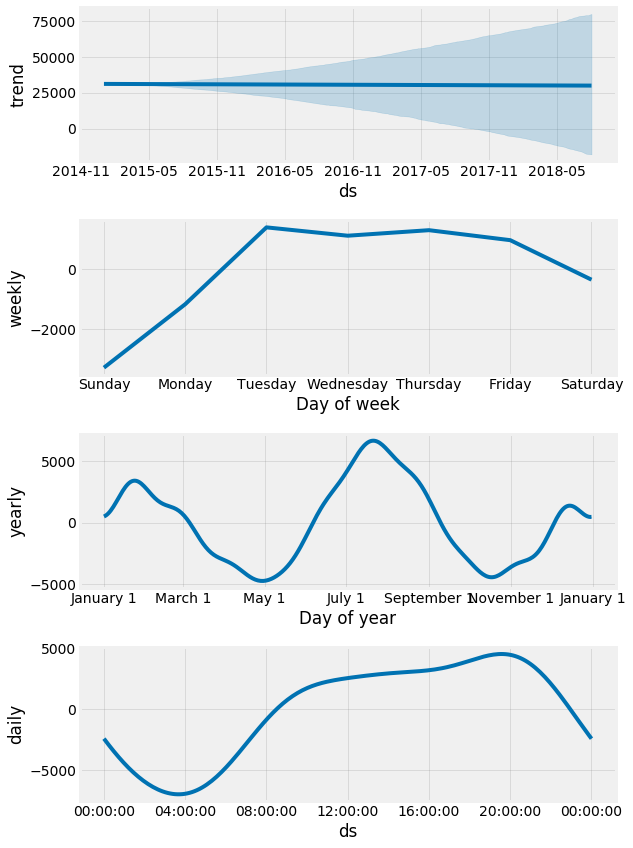

In [69]:
modelo_h = Prophet(holidays=df_h).fit(train)

fig2=modelo_h.plot_components(pred)

In [70]:
pred_h=modelo.predict(test)
pred_h.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31207.063831,23740.786711,32674.824940,31207.063831,31207.063831,-2868.419002,-2868.419002,-2868.419002,-4430.402129,...,1281.405218,1281.405218,1281.405218,280.577909,280.577909,280.577909,0.0,0.0,0.0,28338.644829
1,2015-01-01 02:00:00,31207.026202,22549.330497,31424.067306,31207.026202,31207.026202,-4372.817968,-4372.817968,-4372.817968,-5927.333427,...,1272.645796,1272.645796,1272.645796,281.869663,281.869663,281.869663,0.0,0.0,0.0,26834.208234
2,2015-01-01 03:00:00,31206.988572,21799.088392,30354.852959,31206.988572,31206.988572,-5244.525171,-5244.525171,-5244.525171,-6790.408686,...,1262.680591,1262.680591,1262.680591,283.202924,283.202924,283.202924,0.0,0.0,0.0,25962.463401
3,2015-01-01 04:00:00,31206.950943,21043.326602,30926.971178,31206.950943,31206.950943,-5386.074750,-5386.074750,-5386.074750,-6922.285681,...,1251.633212,1251.633212,1251.633212,284.577718,284.577718,284.577718,0.0,0.0,0.0,25820.876192
4,2015-01-01 05:00:00,31206.913313,22079.578592,31054.788205,31206.913313,31206.913313,-4711.729010,-4711.729010,-4711.729010,-6237.362560,...,1239.639481,1239.639481,1239.639481,285.994069,285.994069,285.994069,0.0,0.0,0.0,26495.184303


In [71]:
mean_squared_error(test.y, pred_h.yhat)**0.5

6617.582523051441

In [72]:
mean_absolute_error(test.y, pred_h.yhat)

5182.773042911244

In [73]:
mape(test.y, pred_h.yhat)

16.510175822754576